In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn import (metrics, cross_validation, linear_model, preprocessing)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_2014_1 = []
for i in range(1,21,1):
    path = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/Train_Test_Data/ML_data_2014_1_'\
            +str(i)+'.csv'
    data_2014_1.append(pd.read_csv(path))

In [3]:
data_train = pd.concat([data_2014_1[3],data_2014_1[4]],axis = 0).reset_index(drop=True)

In [5]:
Feature_data = data_train.drop(["0"],axis=1)
Label = data_train['0']

In [7]:
SEED = 42
def cv_loop_auc(X, y, model, N):
    mean_auc = 0.0
    for i in range(0,N,1):
        X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
                                       X, y, test_size=1.0/float(N), 
                                       random_state = i*SEED)
        model.fit(X_train, y_train)
        preds = model.predict_proba(X_cv)[:,1]
        auc = metrics.roc_auc_score(y_cv, preds)
        #print auc
        mean_auc += auc
    return mean_auc/N

In [19]:
for i in range(1,20,1):
    data_train = pd.concat([data_2014_1[i-1],data_2014_1[i]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    print cv_loop_auc(Feature_data, Label, model, 10)
    

0.616974573334
0.596183410729
0.572501058937
0.635293370031
0.643027297459
0.567899830777
0.637097002704
0.64346265703
0.608997421024
0.605922399782
0.64124436891
0.628219113951
0.614104411974
0.614758853064


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [17]:
model = linear_model.LogisticRegression()
cv_loop_auc(Feature_data, Label, model, 10)

0.61697457333410655

In [20]:
SEED = 42
def cv_loop_acc(X, y, model, N):
    mean_acc = 0.0
    for i in range(0,N,1):
        X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(
                                       X, y, test_size=1.0/float(N), 
                                       random_state = i*SEED)
        model.fit(X_train, y_train)
        preds = model.predict(X_cv)
        acc = metrics.accuracy_score(y_cv, preds)
        #print acc
        mean_acc += acc
    return mean_acc/N

In [85]:
model = linear_model.LogisticRegression()
cv_loop_acc(Feature_data, Label, model, 10)

0.611868686869
0.596464646465
0.610606060606
0.619949494949
0.610101010101
0.614646464646
0.620202020202
0.597222222222
0.602525252525
0.612626262626


0.60962121212121212

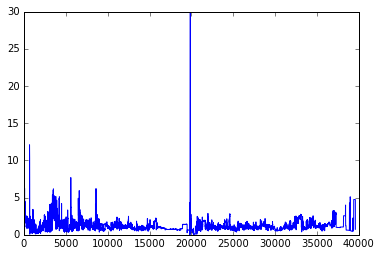

In [35]:
plot(Feature_data['9'])

In [32]:
for i in range(17,20,1):
    data_train = pd.concat([data_2014_1[i-1],data_2014_1[i]],axis = 0).reset_index(drop=True)
    Feature_data = data_train.drop(["0"],axis=1)
    Label = data_train['0']
    model = linear_model.LogisticRegression()
    print i
    print cv_loop_acc(Feature_data, Label, model, 10)

17


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [92]:
from sklearn.grid_search import (GridSearchCV, RandomizedSearchCV)
from sklearn.ensemble import RandomForestClassifier

Feature_data = data_train.drop(["0"],axis=1)
Label = data_train['0']

num_trees = [10]
max_depth = [None]
criterion = ['entropy']
min_samples_leaf = [1,3,5,7]
min_samples_split = [3,5]
max_features = [None]

model_grid = {'max_features':max_features,'n_estimators':num_trees,'max_depth':max_depth,\
              'min_samples_split':min_samples_split,'criterion':criterion,\
              'min_samples_leaf':min_samples_leaf}

model1 = RandomForestClassifier(random_state = 0)
Grid = GridSearchCV(model1, model_grid, cv = 5, scoring = 'roc_auc')

%time Grid.fit(Feature_data, Label) 
Grid.grid_scores_

CPU times: user 5min 38s, sys: 595 ms, total: 5min 38s
Wall time: 6min 21s


[mean: 0.52566, std: 0.08123, params: {'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': None, 'max_depth': None},
 mean: 0.52435, std: 0.08493, params: {'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': None, 'max_depth': None},
 mean: 0.52158, std: 0.08665, params: {'min_samples_leaf': 3, 'n_estimators': 10, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': None, 'max_depth': None},
 mean: 0.52158, std: 0.08665, params: {'min_samples_leaf': 3, 'n_estimators': 10, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': None, 'max_depth': None},
 mean: 0.52830, std: 0.08738, params: {'min_samples_leaf': 5, 'n_estimators': 10, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': None, 'max_depth': None},
 mean: 0.52830, std: 0.08738, params: {'min_samples_leaf': 5, 'n_estimators': 10, 'min_samples_split': 5, 'criterion': 'entropy', 'max_featu

In [93]:
Grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 10}